In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.figure_factory as ff

from tqdm import tqdm, trange

/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
def function_data_historical(df):
  df = df[df['SITUACION_MATRICULA']==1]
  df = df[['SEMESTRE',
                        'ID',
                        'COD_ESTUDIANTE',
                        'ESCUELA_PROFESIONAL',
                        'CANT_CURSO_MAT_CICLO_01', 'CANT_CURSO_MAT_CICLO_02', 'CANT_CURSO_MAT_CICLO_03',
                        'CANT_CURSO_MAT_CICLO_04', 'CANT_CURSO_MAT_CICLO_05', 'CANT_CURSO_MAT_CICLO_06',
                        'CANT_CURSO_MAT_CICLO_07', 'CANT_CURSO_MAT_CICLO_08', 'CANT_CURSO_MAT_CICLO_09',
                        'CANT_CURSO_MAT_CICLO_10', 'CANT_CURSO_MAT_CICLO_11', 'CANT_CURSO_MAT_CICLO_12',
                        'CANT_CURSO_MAT_CICLO_13', 'CANT_CURSO_MAT_CICLO_14',
                        'CANT_CURSO_MAT_DES_CICLO_01', 'CANT_CURSO_MAT_DES_CICLO_02', 'CANT_CURSO_MAT_DES_CICLO_03',
                        'CANT_CURSO_MAT_DES_CICLO_04', 'CANT_CURSO_MAT_DES_CICLO_05', 'CANT_CURSO_MAT_DES_CICLO_06',
                        'CANT_CURSO_MAT_DES_CICLO_07', 'CANT_CURSO_MAT_DES_CICLO_08', 'CANT_CURSO_MAT_DES_CICLO_09',
                        'CANT_CURSO_MAT_DES_CICLO_10', 'CANT_CURSO_MAT_DES_CICLO_11', 'CANT_CURSO_MAT_DES_CICLO_12',
                        'CANT_CURSO_MAT_DES_CICLO_13', 'CANT_CURSO_MAT_DES_CICLO_14'
                        ]]
  df = df.reset_index(drop=True)

  df = df.groupby(['ID']).agg(
                #        NUM_MATRICULAS=('SEMESTRE','count'),
                        COD_ESTUDIANTE=('COD_ESTUDIANTE','max'),
                        ESCUELA_PROFESIONAL=('ESCUELA_PROFESIONAL','max'),
                        NUM_CURSOS_APR_CICLO_01=('CANT_CURSO_MAT_CICLO_01','sum'),
                        NUM_CURSOS_APR_CICLO_02=('CANT_CURSO_MAT_CICLO_02','sum'),
                        NUM_CURSOS_APR_CICLO_03=('CANT_CURSO_MAT_CICLO_03','sum'),
                        NUM_CURSOS_APR_CICLO_04=('CANT_CURSO_MAT_CICLO_04','sum'),
                        NUM_CURSOS_APR_CICLO_05=('CANT_CURSO_MAT_CICLO_05','sum'),
                        NUM_CURSOS_APR_CICLO_06=('CANT_CURSO_MAT_CICLO_06','sum'),
                        NUM_CURSOS_APR_CICLO_07=('CANT_CURSO_MAT_CICLO_07','sum'),
                        NUM_CURSOS_APR_CICLO_08=('CANT_CURSO_MAT_CICLO_08','sum'),
                        NUM_CURSOS_APR_CICLO_09=('CANT_CURSO_MAT_CICLO_09','sum'),
                        NUM_CURSOS_APR_CICLO_10=('CANT_CURSO_MAT_CICLO_10','sum'),
                        NUM_CURSOS_APR_CICLO_11=('CANT_CURSO_MAT_CICLO_11','sum'),
                        NUM_CURSOS_APR_CICLO_12=('CANT_CURSO_MAT_CICLO_12','sum'),
                        NUM_CURSOS_APR_CICLO_13=('CANT_CURSO_MAT_CICLO_13','sum'),
                        NUM_CURSOS_APR_CICLO_14=('CANT_CURSO_MAT_CICLO_14','sum'),
                #         NUM_CURSOS_DES_CICLO_01=('CANT_CURSO_MAT_DES_CICLO_01','sum'),
                #         NUM_CURSOS_DES_CICLO_02=('CANT_CURSO_MAT_DES_CICLO_02','sum'),
                #         NUM_CURSOS_DES_CICLO_03=('CANT_CURSO_MAT_DES_CICLO_03','sum'),
                #         NUM_CURSOS_DES_CICLO_04=('CANT_CURSO_MAT_DES_CICLO_04','sum'),
                #         NUM_CURSOS_DES_CICLO_05=('CANT_CURSO_MAT_DES_CICLO_05','sum'),
                #         NUM_CURSOS_DES_CICLO_06=('CANT_CURSO_MAT_DES_CICLO_06','sum'),
                #         NUM_CURSOS_DES_CICLO_07=('CANT_CURSO_MAT_DES_CICLO_07','sum'),
                #         NUM_CURSOS_DES_CICLO_08=('CANT_CURSO_MAT_DES_CICLO_08','sum'),
                #         NUM_CURSOS_DES_CICLO_09=('CANT_CURSO_MAT_DES_CICLO_09','sum'),
                #         NUM_CURSOS_DES_CICLO_10=('CANT_CURSO_MAT_DES_CICLO_10','sum'),
                #         NUM_CURSOS_DES_CICLO_11=('CANT_CURSO_MAT_DES_CICLO_11','sum'),
                #         NUM_CURSOS_DES_CICLO_12=('CANT_CURSO_MAT_DES_CICLO_12','sum'),
                #         NUM_CURSOS_DES_CICLO_13=('CANT_CURSO_MAT_DES_CICLO_13','sum'),
                #         NUM_CURSOS_DES_CICLO_14=('CANT_CURSO_MAT_DES_CICLO_14','sum'),
      ).sort_values(by=['COD_ESTUDIANTE'], ascending=False)

  df = df.reset_index(drop=False)
  return df

### Preparación de archivo

Este código en Python utiliza las bibliotecas Pandas y Pickle para trabajar con un archivo de Excel y guardarlo en un archivo de formato pickle.

 - La primera línea establece una variable "file" que contiene la ruta al archivo "DataSet_Tesis_COMPLETO_descompress.xlsx".
 - La segunda línea utiliza el método "read_excel" de pandas para leer el archivo de excel especificado en la variable "file" y almacenar los datos en una variable llamada "data".
 - La tercera línea utiliza el método "to_pickle" de pandas para guardar los datos en un archivo llamado "DataSet_Tesis.pkl" en formato pickle.
 - La cuarta línea utiliza el método "read_pickle" de pandas para cargar los datos del archivo pickle "DataSet_Tesis.pkl" en una variable llamada "data".
 
 
En resumen este código esta leyendo un archivo excel, guardando esa información en un archivo pickle y luego cargando nuevamente esa información desde ese archivo pickle.


In [3]:
data = pd.read_pickle('data/DataSet_Tesis.pkl')

In [4]:
import hashlib

data['ID'] = data['COD_ESTUDIANTE'] + data['ESCUELA_PROFESIONAL']
data['ID'] = data['ID'].apply(lambda x: hashlib.sha256(x.encode('utf-8')).hexdigest())
print('Record number:',len(data))

# Eliminamos los ciclos de verano
data = data[~data['SEMESTRE'].str.contains('C|O')]
print('New record number:',len(data))

Record number: 812720
New record number: 797769


##### Lista de alumnos

In [5]:
# Lista de alumnos
alumnos_lista = list(set(data['ID']))
print('Number of students:',len(alumnos_lista))

Number of students: 52926


##### Eliminar datos de alumnos que están incompletos

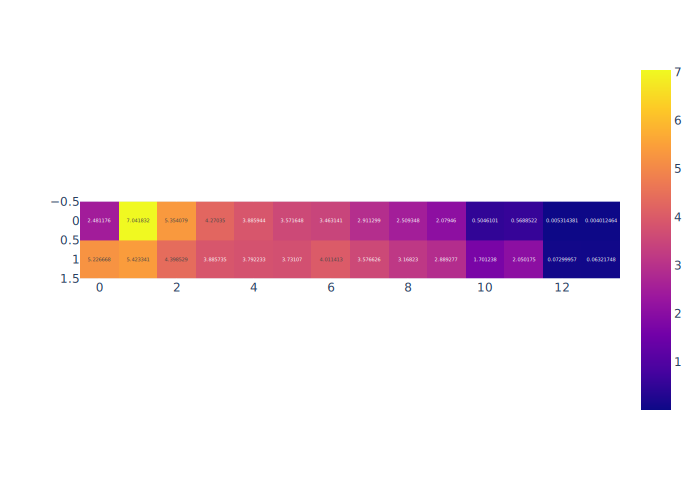

In [6]:
# Data historial del Alumno (evolutivo)
data_historial =  function_data_historical(data)
data_historial.head()

data_img =  data_historial.describe().iloc[1:3,:].values
fig = px.imshow(data_img, text_auto=True)
# fig.show()

fig.show(renderer="svg")

In [7]:
# Eliminamos Alumnos cuya activIDad se registro despues del primer ciclo (son datos sin detalle previo)
alumno_eliminar = data_historial[data_historial['NUM_CURSOS_APR_CICLO_01']==0]['ID'].values
print('Alumnos a eliminar (no se registra sus primeros ciclos): '+str(len(alumno_eliminar)))
data = data[~data['ID'].isin(alumno_eliminar)].reset_index(drop=True)

print('New record number:',len(data))

Alumnos a eliminar (no se registra sus primeros ciclos): 26107
New record number: 393306


In [8]:
# Reconstruimos data historical
data_historial =  function_data_historical(data)
print(len(set(data_historial['ID'])))

data_img =  data_historial.describe().iloc[1:3,:].values
fig = px.imshow(data_img, text_auto=True)
fig.show()


# fig.show(renderer="svg")

20747


### Etiquetando a los alumnos que tuvieron al menos una interrupción (abandono) en su proceso educativo

In [9]:
# IDentificado alumnos que tuvieron un BREAK

def encontrar_espacios(list_values):
  '''
    IDentificado alumnos que tuvieron un BREAK, 
    es decir que  abandonaron la universIDad 
    al menos un periodo.
  '''
  dejo_universIDad = None
  counter = 0
  counter_2 = counter
  previo = -1
  for actual in list_values:
    if previo == 1 and actual == 0:
        dejo_universIDad = True
    elif dejo_universIDad:
      counter_2 += 1
      if actual == 1:
       return counter_2
    else:
      pass    
    previo = actual
  return counter


In [10]:
data_abandono = data[['ID',
                  'COD_ESTUDIANTE',
                  'ESCUELA_PROFESIONAL', 
                  'SEMESTRE',
                  'SITUACION_MATRICULA']
                 ].pivot(
                      index=['ID', 
                             'COD_ESTUDIANTE', 
                             'ESCUELA_PROFESIONAL'], 
                      columns='SEMESTRE', 
                      values='SITUACION_MATRICULA'
                    )
                 
data_abandono = data_abandono.reset_index(drop=False)
data_abandono['lista'] = data_abandono.iloc[:,3:].values.tolist()

data_abandono['ABADONO_PERIODOS'] = data_abandono['lista'].apply(lambda x: encontrar_espacios(x))
data_abandono = data_abandono[['ID', 'COD_ESTUDIANTE', 'ESCUELA_PROFESIONAL', 'ABADONO_PERIODOS']]

data_abandono['ABADONO'] = data_abandono['ABADONO_PERIODOS'].apply(lambda x: 1 if x>0 else 0)

data_abandono.head()

SEMESTRE,ID,COD_ESTUDIANTE,ESCUELA_PROFESIONAL,ABADONO_PERIODOS,ABADONO
0,000269e566cf69064e355019e72c1e80f8cb0042959647...,alumno1516,TURISMO,0,0
1,0002cb7c11f30aa6149820c5ad60e61405efc37178daee...,alumno50422,ADMINISTRACION,0,0
2,000390df44c1034a2a629e6e35c8d54492b487a072e72b...,alumno25682,INGENIERIA DE SISTEMAS,0,0
3,000403d34c694ed4eee1dd7e516ab6e46860024b9b3677...,alumno36011,ARQUITECTURA,0,0
4,00043f82fab338e0c4737e3409950f5f0b26eaaf367fd9...,alumno17934,DERECHO,1,1


##### Figura

In [11]:
abc = data_abandono.groupby(['ABADONO']).agg(NUM_MATRICULAS=('ID','count'))
abc_sum = abc['NUM_MATRICULAS'].sum()
abc['per'] = abc['NUM_MATRICULAS']/abc_sum
abc

,NUM_MATRICULAS,per
ABADONO,,
0,20148,0.751258
1,6671,0.248742


### Preparación de datos

In [12]:
# Lista de alumnos que registran matricula en el ultimo semestre
ultimo_semestre = data['SEMESTRE'].max()
set_alumnos_activos_ultimo_semestre = set(data[(data['SITUACION_MATRICULA']==1) & (data['SEMESTRE']==ultimo_semestre)]['ID'])
print('Alumnos activos el ultimo semestre ('+ultimo_semestre+'): '+ str(len(set_alumnos_activos_ultimo_semestre)))


Alumnos activos el ultimo semestre (2021-1): 8013


In [13]:
def function_activity(x):
  if x > 0:
    return 1
  return 0

# 
data_historial_01 = data_historial.iloc[:,3:].applymap(function_activity)
data_historial_01['ID'] = data_historial[['ID']]

data_historial_01['para_no_termina'] = data_historial_01.iloc[:,8:].sum(axis=1) # alumnos que no cursaron desde el 10 ciclo

n = 5
data_historial_01['para_al_menos_n_ciclos'] = data_historial_01.iloc[:,0:n].sum(axis=1) # alumnos con al menos 5 ciclos registrados

data_historial_01['alumno_activo'] = (data_historial_01['para_no_termina']==0) & (data_historial_01['ID'].isin(set_alumnos_activos_ultimo_semestre))
data_historial_01['alumno_muestra'] = (data_historial_01['para_al_menos_n_ciclos']<n) & (data_historial_01['ID'].isin(set_alumnos_activos_ultimo_semestre) & (data_historial_01['alumno_activo']))
data_historial_01.head()

alumno_muestra = set(data_historial_01[data_historial_01['alumno_muestra']]['ID'])
alumnos_estudiando = set(data_historial_01[data_historial_01['alumno_activo']==True]['ID'])

print("Alumnos aun estudiando: "+str(len(alumnos_estudiando)))
print("Alumnos para los que debemos predecir: "+str(len(alumno_muestra)))

Alumnos aun estudiando: 5553
Alumnos para los que debemos predecir: 2048


/var/folders/yh/mnw4_865319d05f6fkrpt6280000gn/T/ipykernel_34340/1448021903.py:10: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [14]:
abc = data_historial_01.groupby(['alumno_activo']).agg(NUM_ALUMNOS=('ID','count'))
abc_sum = abc['NUM_ALUMNOS'].sum()
abc['per'] = abc['NUM_ALUMNOS']/abc_sum
abc

,NUM_ALUMNOS,per
alumno_activo,,
False,15194,0.732347
True,5553,0.267653


### Reduciendo categorias

In [15]:
data.head()

facultades_data = pd.read_excel('data/Relacion de Escuelas Profesionales por facultad.xlsx', skiprows=3)
facultades_data['ESCUELA_PROFESIONAL'] = facultades_data['ESCUELA PROFESIONAL'].apply(lambda x: x.upper().strip())
facultades_data = facultades_data.set_index('ESCUELA_PROFESIONAL')
facultades_data.head()
facultades_data = facultades_data[['ACRONIMO']].to_dict('index')

def buscar_escuela(x):
  x = x.upper().strip()
  resp = ''
  try:
    resp = facultades_data[x]['ACRONIMO']
  except:
    resp = x
    resp = 'OTROS'
  return resp

data['ESCUELA_PROFESIONAL'] = data['ESCUELA_PROFESIONAL'].apply(lambda x: buscar_escuela(x))


In [16]:
def definir_procedencia(x):
  d = x['DISTRITO_NAC']
  p = x['PROVINCIA_NAC']
  r = x['DEPARTAMENTO_NACIMIENTO']

  if p == 'CUSCO':
    return 'LUGARENIO'
  else:
    return 'FORANEO'

data['PROCEDENCIA'] = data[['DISTRITO_NAC', 'PROVINCIA_NAC', 'DEPARTAMENTO_NACIMIENTO']].apply(lambda x: definir_procedencia(x), axis=1)
del data['DISTRITO_NAC']
del data['PROVINCIA_NAC']
del data['DEPARTAMENTO_NACIMIENTO']


In [17]:

def definir_modalidad_ingreso(x):
# {'                                                  ',
#  'ADJUDICACIONES',
#  'ALUMNO LIBRE',
#  'MOVILIDAD EXTERNA',
#  'PERSONAS EN CONDICIÓN DE DISCAPACIDAD',
#  'TERCIO SUPERIOR DE MERITO ACADÉMICO DE COLEGIOS DE',
#  'TITULADOS DE INSTITUTOS SUPERIORES',
#  'sin especificar'}

  if x in ['CONCURSO DE ADMISIÓN PARA ESTUDIANTES 5TO SECUNDAR', 'CONCURSO ORDINARIO DE ADMISIÓN ',
           'DEPORTISTAS DESTACADOS','GRADUADOS O TITULADOS UNIVERSITARIOS', 'COLEGIOS DE ALTO RENDIMIENTO ACADEMICO',
           'PRIMEROS PUESTOS DE EDUCACIÓN SECUNDARIA DE CUSCO',]:
    return 'CONCURSO'
  elif x in ['CICLO DE NIVELACION', 'CICLO PRE UNIVERSITARIO EXTRAORDINARIO', 'CICLO PRE UNIVERSITARIO ORDINARIO']:
    return 'TRASLADO'
  elif x in ['TRASLADOS EXTERNOS', 'TRASLADOS INTERNOS', 'TRASLADOS INTERNOS EN FACULTAD', 'MOVILIDAD EXTERNA']:
    return 'PRE'
  else:  
    return 'OTRO'
  

data['MODAL_INGRESO'] = data['MODAL_INGRESO'].apply(lambda x: definir_modalidad_ingreso(x))

### Preparación de datos

### Data para predecir

In [18]:
# alumnos iniciantes que queremos saber si tienen la posibilidad de abandonar
#data_to_predict = data[data['ID'].isin(alumno_muestra)].reset_index(drop=True)

# grupo de alumnos cuyos datos estan completos
data_to_work = data[~data['ID'].isin(alumno_muestra)].reset_index(drop=True)

In [19]:
data_to_work[(data_to_work['ID']=='1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc3588d495a377d2aeaf80')].head()

,SEMESTRE,COD_ESTUDIANTE,ESCUELA_PROFESIONAL,SITUACION_MATRICULA,CANT_CURSOS_APROBADOS,CANT_CURSOS_DESAPROBADOS,CANT_CURSOS_NSP,CANT_CRED_APROBADOS,CANT_CRED_DESAPROBADOS,CANT_CRED_NSP,...,CANT_CRED_CONVALIDADOS,PUNT_EXAMEN_ADMINISION,MODAL_INGRESO,COLEGIO_PROCEDENCIA,TIPO_COLEGIO,SEXO_ESTUDIANTE,EDAD_INGRESANTE,NUM_INGRESOS_UNIVERSIDAD,ID,PROCEDENCIA
26,2010-1,alumno6,FD,0,0,0,0,0.0,0.0,0.0,...,0,0,CONCURSO,...,...,M,NaN,1,1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc35...,FORANEO
27,2010-2,alumno6,FD,0,0,0,0,0.0,0.0,0.0,...,0,0,CONCURSO,...,...,M,NaN,1,1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc35...,FORANEO
28,2011-1,alumno6,FD,0,0,0,0,0.0,0.0,0.0,...,0,0,CONCURSO,...,...,M,NaN,1,1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc35...,FORANEO
29,2011-2,alumno6,FD,0,0,0,0,0.0,0.0,0.0,...,0,0,CONCURSO,...,...,M,NaN,1,1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc35...,FORANEO
30,2011-3,alumno6,FD,1,3,0,0,11.0,0.0,0.0,...,0,0,CONCURSO,...,...,M,NaN,1,1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc35...,FORANEO


In [20]:
data_to_work = data_to_work[data_to_work['SITUACION_MATRICULA']==1] # cuan tuvieron activIDad academica
data_features = data_to_work.groupby(['ID']).agg(
                        NUM_MATRICULAS=('SEMESTRE','count'),
                        COD_ESTUDIANTE=('COD_ESTUDIANTE','max'),
                        ESCUELA_PROFESIONAL=('ESCUELA_PROFESIONAL','max'),
                        
                        NUM_CURSOS_APR_CICLO_01=('CANT_CURSO_MAT_CICLO_01','sum'),
                        NUM_CURSOS_APR_CICLO_02=('CANT_CURSO_MAT_CICLO_02','sum'),
                        NUM_CURSOS_APR_CICLO_03=('CANT_CURSO_MAT_CICLO_03','sum'),
                        NUM_CURSOS_APR_CICLO_04=('CANT_CURSO_MAT_CICLO_04','sum'),
                        NUM_CURSOS_APR_CICLO_05=('CANT_CURSO_MAT_CICLO_05','sum'),
                        NUM_CURSOS_APR_CICLO_06=('CANT_CURSO_MAT_CICLO_06','sum'),
                        NUM_CURSOS_APR_CICLO_07=('CANT_CURSO_MAT_CICLO_07','sum'),
                        NUM_CURSOS_APR_CICLO_08=('CANT_CURSO_MAT_CICLO_08','sum'),
                        NUM_CURSOS_APR_CICLO_09=('CANT_CURSO_MAT_CICLO_09','sum'),
                        NUM_CURSOS_APR_CICLO_10=('CANT_CURSO_MAT_CICLO_10','sum'),
                        NUM_CURSOS_APR_CICLO_11=('CANT_CURSO_MAT_CICLO_11','sum'),
                        NUM_CURSOS_APR_CICLO_12=('CANT_CURSO_MAT_CICLO_12','sum'),
                        NUM_CURSOS_APR_CICLO_13=('CANT_CURSO_MAT_CICLO_13','sum'),
                        NUM_CURSOS_APR_CICLO_14=('CANT_CURSO_MAT_CICLO_14','sum'),
                        # ratio
                        CANT_CRED_APR_CICLO_01=('CANT_CRED_MAT_CICLO_01','sum'),
                        CANT_CRED_APR_CICLO_02=('CANT_CRED_MAT_CICLO_02','sum'),
                        CANT_CRED_APR_CICLO_03=('CANT_CRED_MAT_CICLO_03','sum'),
                        CANT_CRED_APR_CICLO_04=('CANT_CRED_MAT_CICLO_04','sum'),
                        CANT_CRED_APR_CICLO_05=('CANT_CRED_MAT_CICLO_05','sum'),
                        CANT_CRED_APR_CICLO_06=('CANT_CRED_MAT_CICLO_06','sum'),
                        CANT_CRED_APR_CICLO_07=('CANT_CRED_MAT_CICLO_07','sum'),
                        CANT_CRED_APR_CICLO_08=('CANT_CRED_MAT_CICLO_08','sum'),
                        CANT_CRED_APR_CICLO_09=('CANT_CRED_MAT_CICLO_09','sum'),
                        CANT_CRED_APR_CICLO_10=('CANT_CRED_MAT_CICLO_10','sum'),
                        CANT_CRED_APR_CICLO_11=('CANT_CRED_MAT_CICLO_11','sum'),
                        CANT_CRED_APR_CICLO_12=('CANT_CRED_MAT_CICLO_12','sum'),
                        CANT_CRED_APR_CICLO_13=('CANT_CRED_MAT_CICLO_13','sum'),
                        CANT_CRED_APR_CICLO_14=('CANT_CRED_MAT_CICLO_14','sum'),
                        NUM_CURSOS_DES_CICLO_01=('CANT_CURSO_MAT_DES_CICLO_01','sum'),
                        NUM_CURSOS_DES_CICLO_02=('CANT_CURSO_MAT_DES_CICLO_02','sum'),
                        NUM_CURSOS_DES_CICLO_03=('CANT_CURSO_MAT_DES_CICLO_03','sum'),
                        NUM_CURSOS_DES_CICLO_04=('CANT_CURSO_MAT_DES_CICLO_04','sum'),
                        NUM_CURSOS_DES_CICLO_05=('CANT_CURSO_MAT_DES_CICLO_05','sum'),
                        NUM_CURSOS_DES_CICLO_06=('CANT_CURSO_MAT_DES_CICLO_06','sum'),
                        NUM_CURSOS_DES_CICLO_07=('CANT_CURSO_MAT_DES_CICLO_07','sum'),
                        NUM_CURSOS_DES_CICLO_08=('CANT_CURSO_MAT_DES_CICLO_08','sum'),
                        NUM_CURSOS_DES_CICLO_09=('CANT_CURSO_MAT_DES_CICLO_09','sum'),
                        NUM_CURSOS_DES_CICLO_10=('CANT_CURSO_MAT_DES_CICLO_10','sum'),
                        NUM_CURSOS_DES_CICLO_11=('CANT_CURSO_MAT_DES_CICLO_11','sum'),
                        NUM_CURSOS_DES_CICLO_12=('CANT_CURSO_MAT_DES_CICLO_12','sum'),
                        NUM_CURSOS_DES_CICLO_13=('CANT_CURSO_MAT_DES_CICLO_13','sum'),
                        NUM_CURSOS_DES_CICLO_14=('CANT_CURSO_MAT_DES_CICLO_14','sum'),
                        CANT_CRED_DES_CICLO_01=('CANT_CRED_MAT_DES_CICLO_01','sum'),
                        CANT_CRED_DES_CICLO_02=('CANT_CRED_MAT_DES_CICLO_02','sum'),
                        CANT_CRED_DES_CICLO_03=('CANT_CRED_MAT_DES_CICLO_03','sum'),
                        CANT_CRED_DES_CICLO_04=('CANT_CRED_MAT_DES_CICLO_04','sum'),
                        CANT_CRED_DES_CICLO_05=('CANT_CRED_MAT_DES_CICLO_05','sum'),
                        CANT_CRED_DES_CICLO_06=('CANT_CRED_MAT_DES_CICLO_06','sum'),
                        CANT_CRED_DES_CICLO_07=('CANT_CRED_MAT_DES_CICLO_07','sum'),
                        CANT_CRED_DES_CICLO_08=('CANT_CRED_MAT_DES_CICLO_08','sum'),
                        CANT_CRED_DES_CICLO_09=('CANT_CRED_MAT_DES_CICLO_09','sum'),
                        CANT_CRED_DES_CICLO_10=('CANT_CRED_MAT_DES_CICLO_10','sum'),
                        CANT_CRED_DES_CICLO_11=('CANT_CRED_MAT_DES_CICLO_11','sum'),
                        CANT_CRED_DES_CICLO_12=('CANT_CRED_MAT_DES_CICLO_12','sum'),
                        CANT_CRED_DES_CICLO_13=('CANT_CRED_MAT_DES_CICLO_13','sum'),
                        CANT_CRED_DES_CICLO_14=('CANT_CRED_MAT_DES_CICLO_14','sum'),
                        
                        PORC_ASISTENCIA_MEAN=('PORC_ASISTENCIA','mean'),
                        PORC_ASISTENCIA_STD=('PORC_ASISTENCIA','std'),
                        EDAD_ANIO_ESTUDIO_MIN=('EDAD_ANIO_ESTUDIO','min'),
                        # EDAD_ANIO_ESTUDIO_MAX=('EDAD_ANIO_ESTUDIO','max'),
                        SITUACION_DESERCION_AL_SEM=('SITUACION_DESERCION_AL_SEM','mean'),
                        # PLAN_ESTUDIOS_INGRESO=('PLAN_ESTUDIOS_INGRESO','min'),
                        # PLAN_ESTUDIOS_ACTUAL=('PLAN_ESTUDIOS_ACTUAL','max'),
                        PLAN_ESTUDIOS_CAMBIO=('PLAN_ESTUDIOS_ACTUAL','count'),
                        MONTO_PENSION_MEAN=('MONTO_PENSION','mean'),
                        MONTO_PENSION_STD=('MONTO_PENSION','std'),
                        # MONTO_PENSION_MIN=('MONTO_PENSION','min'),
                        # MONTO_PENSION_MAX=('MONTO_PENSION','max'),
                        MATRICULA_EXTEMPORANEO=('MATRICULA_EXTEMPORANEO','sum'),
                        CANT_ASIG_CONVALIDADOS=('CANT_ASIG_CONVALIDADOS','sum'),
                        CANT_CRED_CONVALIDADOS=('CANT_CRED_CONVALIDADOS','sum'),
                        PUNT_EXAMEN_ADMINISION=('PUNT_EXAMEN_ADMINISION','mean'),
                        MODAL_INGRESO=('MODAL_INGRESO','max'),
                        #COLEGIO_PROCEDENCIA=('COLEGIO_PROCEDENCIA','max'),
                        TIPO_COLEGIO=('TIPO_COLEGIO','max'),
                        SEXO_ESTUDIANTE=('SEXO_ESTUDIANTE','max'),
                        EDAD_INGRESANTE=('EDAD_INGRESANTE','min'),
                        NUM_INGRESOS_UNIVERSIDAD=('NUM_INGRESOS_UNIVERSIDAD','mean'),
                        #DEPARTAMENTO_NACIMIENTO=('DEPARTAMENTO_NACIMIENTO','max'),
                        #PROVINCIA_NACIMIENTO=('PROVINCIA_NAC','max'),
                        #DISTRITO_NACIMIENTO=('DISTRITO_NAC','max'),
                        PROCEDENCIA=('PROCEDENCIA','max'),
        ).sort_values(by=['COD_ESTUDIANTE'], ascending=False)

data_features = data_features.reset_index(drop=False)

In [21]:
data_features[data_features['ID']=='1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc3588d495a377d2aeaf80']

,ID,NUM_MATRICULAS,COD_ESTUDIANTE,ESCUELA_PROFESIONAL,NUM_CURSOS_APR_CICLO_01,NUM_CURSOS_APR_CICLO_02,NUM_CURSOS_APR_CICLO_03,NUM_CURSOS_APR_CICLO_04,NUM_CURSOS_APR_CICLO_05,NUM_CURSOS_APR_CICLO_06,...,MATRICULA_EXTEMPORANEO,CANT_ASIG_CONVALIDADOS,CANT_CRED_CONVALIDADOS,PUNT_EXAMEN_ADMINISION,MODAL_INGRESO,TIPO_COLEGIO,SEXO_ESTUDIANTE,EDAD_INGRESANTE,NUM_INGRESOS_UNIVERSIDAD,PROCEDENCIA
1029,1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc35...,10,alumno6,FD,1,5,4,1,0,4,...,0,0,0,0.0,CONCURSO,...,M,NaN,1.0,FORANEO


### Metricar para resumir vectores

In [22]:
# Numero de periodos activos


# Media del vector

# Desviacion del vector

# Desviación estándar: es una medida de la dispersión de los datos alrededor de la media. Una desviación estándar más alta indica una mayor variabilidad de los datos.
# Rango: es la diferencia entre el valor máximo y el valor mínimo de los datos. Un rango más amplio indica una mayor variabilidad de los datos.
# Varianza: es una medida de la dispersión de los datos alrededor de la media, similar a la desviación estándar.
# Coeficiente de variación: es una medida de la variabilidad relativa de los datos, se calcula como la desviación estándar dividida entre la media.
# Curtosis: es una medida de la asimetría de los datos, una curtosis más alta indica una mayor concentración de valores en los extremos.
# Skewness: es una medida de la simetría de los datos, una asimetría positiva indica que los datos tienden a tener un sesgo hacia la derecha y una asimetría negativa indica que los datos tienden a tener un sesgo hacia la izquierda.
# Boxplot: es una herramienta gráfica utilizada para visualizar la distribución de los datos y para detectar valores atípicos.
# Correlación: es una medida de la relación lineal entre dos variables.
# Entropía: es una medida de la incertidumbre o complejidad en un sistema estadístico.

In [23]:
def vector_metrics(df, tag, columns):
    ''' 
     resume el vector en valores representaticos 
    '''
    
    df[tag+'_MEAN'] = df[columns].mean(axis=1)
    df[tag+'_STD'] = df[columns].std(axis=1)
    # data_temp['Percentage_total'] = data_temp['Percentage_total'].apply(lambda x: round( x * 100, 2))
    
    for col in columns:
        del df[col]
        
    return df

In [24]:
data_temp = data_features.copy()

In [25]:
columns_metrics = ['NUM_CURSOS_APR_CICLO_01', 'NUM_CURSOS_APR_CICLO_02', 'NUM_CURSOS_APR_CICLO_03', 'NUM_CURSOS_APR_CICLO_04',
                    'NUM_CURSOS_APR_CICLO_05', 'NUM_CURSOS_APR_CICLO_06','NUM_CURSOS_APR_CICLO_07', 'NUM_CURSOS_APR_CICLO_08',
                    'NUM_CURSOS_APR_CICLO_09', 'NUM_CURSOS_APR_CICLO_10','NUM_CURSOS_APR_CICLO_11', 'NUM_CURSOS_APR_CICLO_12',
                    'NUM_CURSOS_APR_CICLO_13', 'NUM_CURSOS_APR_CICLO_14']
data_temp = vector_metrics(
                    data_temp,
                    tag='NUM_CURSOS_APR',
                    columns = columns_metrics,
                    )

columns_metrics = ['CANT_CRED_APR_CICLO_01', 'CANT_CRED_APR_CICLO_02', 'CANT_CRED_APR_CICLO_03', 'CANT_CRED_APR_CICLO_04',
                    'CANT_CRED_APR_CICLO_05', 'CANT_CRED_APR_CICLO_06','CANT_CRED_APR_CICLO_07', 'CANT_CRED_APR_CICLO_08',
                    'CANT_CRED_APR_CICLO_09', 'CANT_CRED_APR_CICLO_10','CANT_CRED_APR_CICLO_11', 'CANT_CRED_APR_CICLO_12',
                    'CANT_CRED_APR_CICLO_13', 'CANT_CRED_APR_CICLO_14',]
data_temp = vector_metrics(
                    data_temp,
                    tag='CANT_CRED_APR',
                    columns = columns_metrics,
                    )

columns_metrics = ['NUM_CURSOS_DES_CICLO_01', 'NUM_CURSOS_DES_CICLO_02', 'NUM_CURSOS_DES_CICLO_03', 'NUM_CURSOS_DES_CICLO_04',
                    'NUM_CURSOS_DES_CICLO_05', 'NUM_CURSOS_DES_CICLO_06', 'NUM_CURSOS_DES_CICLO_07', 'NUM_CURSOS_DES_CICLO_08',
                    'NUM_CURSOS_DES_CICLO_09', 'NUM_CURSOS_DES_CICLO_10','NUM_CURSOS_DES_CICLO_11', 'NUM_CURSOS_DES_CICLO_12',
                    'NUM_CURSOS_DES_CICLO_13', 'NUM_CURSOS_DES_CICLO_14',]
data_temp = vector_metrics(
                    data_temp,
                    tag='NUM_CURSOS_DES',
                    columns = columns_metrics,
                )

columns_metrics = ['CANT_CRED_DES_CICLO_01', 'CANT_CRED_DES_CICLO_02', 'CANT_CRED_DES_CICLO_03', 'CANT_CRED_DES_CICLO_04',
                    'CANT_CRED_DES_CICLO_05', 'CANT_CRED_DES_CICLO_06', 'CANT_CRED_DES_CICLO_07', 'CANT_CRED_DES_CICLO_08',
                    'CANT_CRED_DES_CICLO_09', 'CANT_CRED_DES_CICLO_10','CANT_CRED_DES_CICLO_11', 'CANT_CRED_DES_CICLO_12',
                    'CANT_CRED_DES_CICLO_13', 'CANT_CRED_DES_CICLO_14',]
data_temp = vector_metrics(
                    data_temp,
                    tag='CANT_CRED_DES',
                    columns = columns_metrics,
                )

data_temp.head()

,ID,NUM_MATRICULAS,COD_ESTUDIANTE,ESCUELA_PROFESIONAL,PORC_ASISTENCIA_MEAN,PORC_ASISTENCIA_STD,EDAD_ANIO_ESTUDIO_MIN,SITUACION_DESERCION_AL_SEM,PLAN_ESTUDIOS_CAMBIO,MONTO_PENSION_MEAN,...,NUM_INGRESOS_UNIVERSIDAD,PROCEDENCIA,NUM_CURSOS_APR_MEAN,NUM_CURSOS_APR_STD,CANT_CRED_APR_MEAN,CANT_CRED_APR_STD,NUM_CURSOS_DES_MEAN,NUM_CURSOS_DES_STD,CANT_CRED_DES_MEAN,CANT_CRED_DES_STD
0,bf2d491362fd7c34e4d0b22fbb7e58a1dc4f17ef7119a8...,13,alumno9992,FCEAC,0.088462,0.144617,19,0.0,13,346.469231,...,1.0,LUGARENIO,4.142857,8.151047,15.285714,30.877995,3.928571,7.760494,14.500000,29.528995
1,51d49892e1836a37db452c2790c825adaede770414e26b...,16,alumno9991,FCEAC,0.189375,0.340382,18,0.0,16,319.115625,...,1.0,FORANEO,4.785714,5.859622,17.785714,22.405970,2.285714,4.445024,8.571429,16.919330
2,73870552a975159138bf2bbf4802e3e43b38454b4ffee3...,6,alumno999,OTROS,0.000000,0.000000,0,0.0,6,102.000000,...,1.0,FORANEO,1.500000,2.066212,5.214286,7.536359,0.500000,1.091928,1.571429,3.321591
3,a8d048b5542abb8a5f1101f4239c2c0428d2266af06cea...,23,alumno9984,FCEAC,0.300000,0.332005,17,0.0,23,330.082609,...,1.0,FORANEO,7.642857,7.986596,27.071429,27.516329,4.071429,6.810222,14.357143,23.766839
4,fcbce9a3e742b7e8702afeebb2a3a0cb9004cdc94a3887...,22,alumno9980,FCEAC,0.205000,0.287613,17,0.0,22,377.950000,...,1.0,FORANEO,7.285714,11.062261,25.714286,39.456751,5.428571,8.959003,19.500000,32.255590


In [26]:
data_features = pd.merge(data_temp, # data_features,
                         data_abandono[['ID', 'ABADONO']],
                         #data_abandono[['ID', 'ABADONO_PERIODOS', 'ABADONO']],
                         how="left",
                         left_on=['ID'],
                         right_on=['ID'],
                         sort=True,
                         suffixes=("_x", "_y"),
                        )

del data_features['COD_ESTUDIANTE']
data_features = data_features.set_index('ID')
data_features.head(3)

,NUM_MATRICULAS,ESCUELA_PROFESIONAL,PORC_ASISTENCIA_MEAN,PORC_ASISTENCIA_STD,EDAD_ANIO_ESTUDIO_MIN,SITUACION_DESERCION_AL_SEM,PLAN_ESTUDIOS_CAMBIO,MONTO_PENSION_MEAN,MONTO_PENSION_STD,MATRICULA_EXTEMPORANEO,...,PROCEDENCIA,NUM_CURSOS_APR_MEAN,NUM_CURSOS_APR_STD,CANT_CRED_APR_MEAN,CANT_CRED_APR_STD,NUM_CURSOS_DES_MEAN,NUM_CURSOS_DES_STD,CANT_CRED_DES_MEAN,CANT_CRED_DES_STD,ABADONO
ID,,,,,,,,,,,,,,,,,,,,,
000390df44c1034a2a629e6e35c8d54492b487a072e72be8a1b7782dce2b0c22,1,FIA,0.000000,NaN,19,0.0,1,445.150000,NaN,0,...,LUGARENIO,0.285714,0.825420,0.928571,2.555967,0.285714,0.825420,0.928571,2.555967,0
000403d34c694ed4eee1dd7e516ab6e46860024b9b36778f455950028f211a39,1,FIA,0.140000,NaN,18,0.0,1,707.000000,NaN,0,...,LUGARENIO,0.571429,2.138090,1.571429,5.879747,0.428571,1.603567,1.214286,4.543441,0
00043f82fab338e0c4737e3409950f5f0b26eaaf367fd97b7b1ffdd7be62c542,19,FD,0.387895,0.325433,19,0.0,19,485.713158,83.151799,0,...,LUGARENIO,7.500000,5.229355,25.714286,18.420008,2.642857,3.455367,9.285714,12.231288,1


In [27]:
data_features.columns

Index(['NUM_MATRICULAS', 'ESCUELA_PROFESIONAL', 'PORC_ASISTENCIA_MEAN',
       'PORC_ASISTENCIA_STD', 'EDAD_ANIO_ESTUDIO_MIN',
       'SITUACION_DESERCION_AL_SEM', 'PLAN_ESTUDIOS_CAMBIO',
       'MONTO_PENSION_MEAN', 'MONTO_PENSION_STD', 'MATRICULA_EXTEMPORANEO',
       'CANT_ASIG_CONVALIDADOS', 'CANT_CRED_CONVALIDADOS',
       'PUNT_EXAMEN_ADMINISION', 'MODAL_INGRESO', 'TIPO_COLEGIO',
       'SEXO_ESTUDIANTE', 'EDAD_INGRESANTE', 'NUM_INGRESOS_UNIVERSIDAD',
       'PROCEDENCIA', 'NUM_CURSOS_APR_MEAN', 'NUM_CURSOS_APR_STD',
       'CANT_CRED_APR_MEAN', 'CANT_CRED_APR_STD', 'NUM_CURSOS_DES_MEAN',
       'NUM_CURSOS_DES_STD', 'CANT_CRED_DES_MEAN', 'CANT_CRED_DES_STD',
       'ABADONO'],
      dtype='object')

##### Figura

In [28]:
abc = data_features.groupby(['ABADONO']).agg(NUM_MATRICULAS=('NUM_MATRICULAS','count'))
abc_sum = abc['NUM_MATRICULAS'].sum()
abc['per'] = abc['NUM_MATRICULAS']/abc_sum
abc

,NUM_MATRICULAS,per
ABADONO,,
0,12591,0.673352
1,6108,0.326648


In [29]:
categorical_col = list(data_features.select_dtypes(include=['object']).columns)
for col in categorical_col:
  print(col)
  data_features[col] = data_features[col].fillna('OTRO')

ESCUELA_PROFESIONAL
MODAL_INGRESO
TIPO_COLEGIO
SEXO_ESTUDIANTE
PROCEDENCIA


In [30]:
data_features.isna().sum()

NUM_MATRICULAS                   0
ESCUELA_PROFESIONAL              0
PORC_ASISTENCIA_MEAN             0
PORC_ASISTENCIA_STD           2027
EDAD_ANIO_ESTUDIO_MIN            0
SITUACION_DESERCION_AL_SEM       0
PLAN_ESTUDIOS_CAMBIO             0
MONTO_PENSION_MEAN               0
MONTO_PENSION_STD             2027
MATRICULA_EXTEMPORANEO           0
CANT_ASIG_CONVALIDADOS           0
CANT_CRED_CONVALIDADOS           0
PUNT_EXAMEN_ADMINISION           0
MODAL_INGRESO                    0
TIPO_COLEGIO                     0
SEXO_ESTUDIANTE                  0
EDAD_INGRESANTE                818
NUM_INGRESOS_UNIVERSIDAD         0
PROCEDENCIA                      0
NUM_CURSOS_APR_MEAN              0
NUM_CURSOS_APR_STD               0
CANT_CRED_APR_MEAN               0
CANT_CRED_APR_STD                0
NUM_CURSOS_DES_MEAN              0
NUM_CURSOS_DES_STD               0
CANT_CRED_DES_MEAN               0
CANT_CRED_DES_STD                0
ABADONO                          0
dtype: int64

In [31]:
numeric_nan_col = list(data_features.columns[data_features.isna().any()])
for col in numeric_nan_col:
  print(col)
  mean = np.mean(data_features[col])
  data_features[col] = data_features[col].fillna(mean)

data_features.columns[data_features.isna().any()]

PORC_ASISTENCIA_STD
MONTO_PENSION_STD
EDAD_INGRESANTE


Index([], dtype='object')

## Balanceo de datos - previas

Definiremos 3 grupos de datos, 
- **Datos por definir y a clasificar**: son los que no terminaron, para ello asumimos que son todos lo que estan estudiando, y no terminaron la carrera en el ultimo perIDo.

Luego con los datos restantes haremos un corte de los primero "n" ciclo, y asumiremos que sera el minimo numero de perIDos necesarios para poder hacer una predicción.
- **Datos de entrenamiento**:
- **Datos de muestras**:

In [32]:
data_features = pd.get_dummies(data_features, columns = categorical_col)

data_features.head()

,NUM_MATRICULAS,PORC_ASISTENCIA_MEAN,PORC_ASISTENCIA_STD,EDAD_ANIO_ESTUDIO_MIN,SITUACION_DESERCION_AL_SEM,PLAN_ESTUDIOS_CAMBIO,MONTO_PENSION_MEAN,MONTO_PENSION_STD,MATRICULA_EXTEMPORANEO,CANT_ASIG_CONVALIDADOS,...,MODAL_INGRESO_OTRO,MODAL_INGRESO_PRE,MODAL_INGRESO_TRASLADO,TIPO_COLEGIO_,TIPO_COLEGIO_ESTATAL,TIPO_COLEGIO_PARTICULAR,SEXO_ESTUDIANTE_F,SEXO_ESTUDIANTE_M,PROCEDENCIA_FORANEO,PROCEDENCIA_LUGARENIO
ID,,,,,,,,,,,,,,,,,,,,,
000390df44c1034a2a629e6e35c8d54492b487a072e72be8a1b7782dce2b0c22,1,0.000000,0.263984,19,0.0,1,445.150000,69.129450,0,0,...,0,0,0,1,0,0,1,0,0,1
000403d34c694ed4eee1dd7e516ab6e46860024b9b36778f455950028f211a39,1,0.140000,0.263984,18,0.0,1,707.000000,69.129450,0,0,...,1,0,0,0,0,1,1,0,0,1
00043f82fab338e0c4737e3409950f5f0b26eaaf367fd97b7b1ffdd7be62c542,19,0.387895,0.325433,19,0.0,19,485.713158,83.151799,0,0,...,0,0,0,1,0,0,1,0,0,1
0005680d9835a1671f286e461057485d13d6f5d9948828bfc389badcb66407f6,7,0.424286,0.225969,18,0.0,7,400.264286,320.755666,0,0,...,1,0,0,0,0,1,0,1,0,1
000728dbeb393d3cc563705aa60da739f1cfae803de4d08d0e7a299a081a2b56,1,0.000000,0.263984,21,0.0,1,381.000000,69.129450,0,0,...,0,0,0,1,0,0,0,1,1,0


In [33]:
from sklearn.model_selection import train_test_split


X = data_features.iloc[:,:-1]
y = data_features['ABADONO']

len(X), len(y)

(18699, 18699)

In [34]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [35]:
y_resampled.values

array([0, 0, 1, ..., 1, 1, 1])

(array([12591.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12591.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

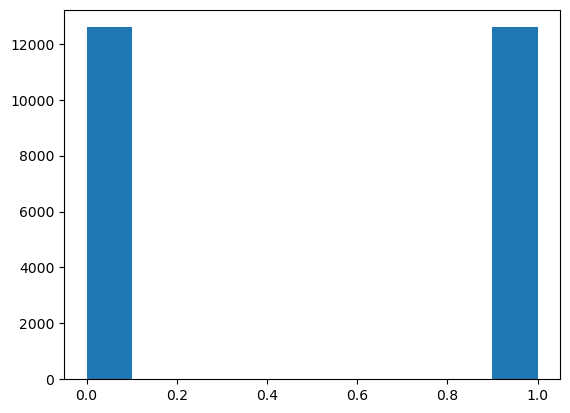

In [36]:
plt.hist(y_resampled.values)

In [37]:
X_resampled.columns

Index(['NUM_MATRICULAS', 'PORC_ASISTENCIA_MEAN', 'PORC_ASISTENCIA_STD',
       'EDAD_ANIO_ESTUDIO_MIN', 'SITUACION_DESERCION_AL_SEM',
       'PLAN_ESTUDIOS_CAMBIO', 'MONTO_PENSION_MEAN', 'MONTO_PENSION_STD',
       'MATRICULA_EXTEMPORANEO', 'CANT_ASIG_CONVALIDADOS',
       'CANT_CRED_CONVALIDADOS', 'PUNT_EXAMEN_ADMINISION', 'EDAD_INGRESANTE',
       'NUM_INGRESOS_UNIVERSIDAD', 'NUM_CURSOS_APR_MEAN', 'NUM_CURSOS_APR_STD',
       'CANT_CRED_APR_MEAN', 'CANT_CRED_APR_STD', 'NUM_CURSOS_DES_MEAN',
       'NUM_CURSOS_DES_STD', 'CANT_CRED_DES_MEAN', 'CANT_CRED_DES_STD',
       'ABADONO', 'ESCUELA_PROFESIONAL_FCEAC', 'ESCUELA_PROFESIONAL_FCSA',
       'ESCUELA_PROFESIONAL_FCyH', 'ESCUELA_PROFESIONAL_FD',
       'ESCUELA_PROFESIONAL_FIA', 'ESCUELA_PROFESIONAL_OTROS',
       'MODAL_INGRESO_CONCURSO', 'MODAL_INGRESO_OTRO', 'MODAL_INGRESO_PRE',
       'MODAL_INGRESO_TRASLADO',
       'TIPO_COLEGIO_                                                  ',
       'TIPO_COLEGIO_ESTATAL', 'TIPO_COLEGIO_PAR

In [38]:
X_resampled['target'] = y_resampled
X_resampled.to_csv('data/model_imput.csv', index=False)

X_resampled.columns

Index(['NUM_MATRICULAS', 'PORC_ASISTENCIA_MEAN', 'PORC_ASISTENCIA_STD',
       'EDAD_ANIO_ESTUDIO_MIN', 'SITUACION_DESERCION_AL_SEM',
       'PLAN_ESTUDIOS_CAMBIO', 'MONTO_PENSION_MEAN', 'MONTO_PENSION_STD',
       'MATRICULA_EXTEMPORANEO', 'CANT_ASIG_CONVALIDADOS',
       'CANT_CRED_CONVALIDADOS', 'PUNT_EXAMEN_ADMINISION', 'EDAD_INGRESANTE',
       'NUM_INGRESOS_UNIVERSIDAD', 'NUM_CURSOS_APR_MEAN', 'NUM_CURSOS_APR_STD',
       'CANT_CRED_APR_MEAN', 'CANT_CRED_APR_STD', 'NUM_CURSOS_DES_MEAN',
       'NUM_CURSOS_DES_STD', 'CANT_CRED_DES_MEAN', 'CANT_CRED_DES_STD',
       'ABADONO', 'ESCUELA_PROFESIONAL_FCEAC', 'ESCUELA_PROFESIONAL_FCSA',
       'ESCUELA_PROFESIONAL_FCyH', 'ESCUELA_PROFESIONAL_FD',
       'ESCUELA_PROFESIONAL_FIA', 'ESCUELA_PROFESIONAL_OTROS',
       'MODAL_INGRESO_CONCURSO', 'MODAL_INGRESO_OTRO', 'MODAL_INGRESO_PRE',
       'MODAL_INGRESO_TRASLADO',
       'TIPO_COLEGIO_                                                  ',
       'TIPO_COLEGIO_ESTATAL', 'TIPO_COLEGIO_PAR

In [39]:
X_resampled.head()

,NUM_MATRICULAS,PORC_ASISTENCIA_MEAN,PORC_ASISTENCIA_STD,EDAD_ANIO_ESTUDIO_MIN,SITUACION_DESERCION_AL_SEM,PLAN_ESTUDIOS_CAMBIO,MONTO_PENSION_MEAN,MONTO_PENSION_STD,MATRICULA_EXTEMPORANEO,CANT_ASIG_CONVALIDADOS,...,MODAL_INGRESO_OTRO,MODAL_INGRESO_PRE,MODAL_INGRESO_TRASLADO,TIPO_COLEGIO_,TIPO_COLEGIO_ESTATAL,TIPO_COLEGIO_PARTICULAR,SEXO_ESTUDIANTE_F,SEXO_ESTUDIANTE_M,PROCEDENCIA_FORANEO,target
0,1,0.000000,0.263984,19,0.0,1,445.150000,69.129450,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,0.140000,0.263984,18,0.0,1,707.000000,69.129450,0,0,...,1,0,0,0,0,1,1,0,0,0
2,19,0.387895,0.325433,19,0.0,19,485.713158,83.151799,0,0,...,0,0,0,1,0,0,1,0,0,1
3,7,0.424286,0.225969,18,0.0,7,400.264286,320.755666,0,0,...,1,0,0,0,0,1,0,1,0,0
4,1,0.000000,0.263984,21,0.0,1,381.000000,69.129450,0,0,...,0,0,0,1,0,0,0,1,1,0
